# **Hand Coded Example to Understand Confusion Matrix**

In [ ]:
# Binary Classifier Measurements 
# "1" Means Ship with Treasure and "0" Means Ship Without Treasure 
actual_a = [1 for n in range(10)] + [0 for n in range(10)]
predicted_a = [1 for n in range(9)] + [0, 1, 1] + [0 for n in range(8)]
print(actual_a)
print(predicted_a)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

def my_confusion_matrix(actual, predicted):
    true_positives = len([a for a, p in zip(actual, predicted) if a == p and p == 1])
    true_negatives = len([a for a, p in zip(actual, predicted) if a == p and p == 0])
    false_positives = len([a for a, p in zip(actual, predicted) if a != p and p == 1])
    false_negatives = len([a for a, p in zip(actual, predicted) if a != p and p == 0])
    return "[[{} {}]\n  [{} {}]]".format(true_positives,false_negatives, false_positives,true_negatives)

print("my Confusion Matrix A:\n", my_confusion_matrix(actual_a, predicted_a))
print("sklearn Confusion Matrix A:\n", confusion_matrix(actual_a, predicted_a))

my Confusion Matrix A:
 [[9 1]
  [2 8]]
sklearn Confusion Matrix A:
 [[8 2]
 [1 9]]


****MY CONFUSION MATRIX PLOT*****
                   Predicted Label
True Label
                   TP   FN
                   FP   TN


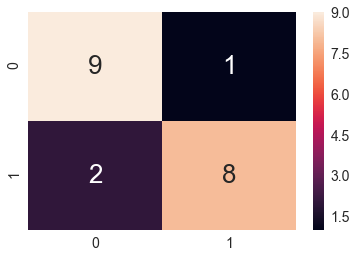

****SKLEARN CONFUSION MATRIX PLOT*****
                   Predicted Label
True Label
                   TN   FP
                   FN   TP


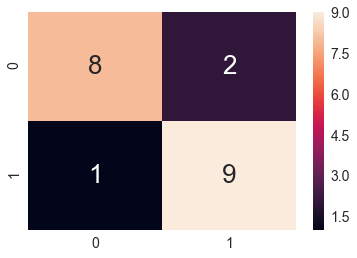

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[9,1], 
        [2,8]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 26}) # font size
print("****MY CONFUSION MATRIX PLOT*****")
print("                   Predicted Label")
print("True Label")
print("                   TP   FN")
print("                   FP   TN")
plt.show()


array = [[8,2], 
        [1,9]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 26}) # font size
print("****SKLEARN CONFUSION MATRIX PLOT*****")
print("                   Predicted Label")
print("True Label")
print("                   TN   FP")
print("                   FN   TP")
plt.show()



In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score

# Accuracy = TP + TN / TP + TN + FP + FN
def my_accuracy_score(actual, predicted): #threshold for non-classification?  
    true_positives = len([a for a, p in zip(actual, predicted) if a == p and p == 1])
    true_negatives = len([a for a, p in zip(actual, predicted) if a == p and p == 0])
    false_positives = len([a for a, p in zip(actual, predicted) if a != p and p == 1])
    false_negatives = len([a for a, p in zip(actual, predicted) if a != p and p == 0])
    return (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

print("my Accuracy A:", my_accuracy_score(actual_a, predicted_a))
print("sklearn Accuracy A:", accuracy_score(actual_a, predicted_a))

my Accuracy A: 0.85
sklearn Accuracy A: 0.85


In [ ]:
# Precision
from sklearn.metrics import precision_score

# Precision = TP / TP + FP
def my_precision_score(actual, predicted):
    true_positives = len([a for a, p in zip(actual, predicted) if a == p and p == 1])
    false_positives = len([a for a, p in zip(actual, predicted) if a != p and p == 1])
    return true_positives / (true_positives + false_positives)

print("my Precision A:", my_precision_score(actual_a, predicted_a))
print("sklearn Precision A:", precision_score(actual_a, predicted_a))

my Precision A: 0.8181818181818182
sklearn Precision A: 0.8181818181818182


In [ ]:
# Recall
from sklearn.metrics import recall_score

def my_recall_score(actual, predicted):
    true_positives = len([a for a, p in zip(actual, predicted) if a == p and p == 1])
    false_negatives = len([a for a, p in zip(actual, predicted) if a != p and p == 0])
    return true_positives / (true_positives + false_negatives)

print("my Recall A:", my_recall_score(actual_a, predicted_a))
print("sklearn Recall A:", recall_score(actual_a, predicted_a))

my Recall A: 0.9
sklearn Recall A: 0.9


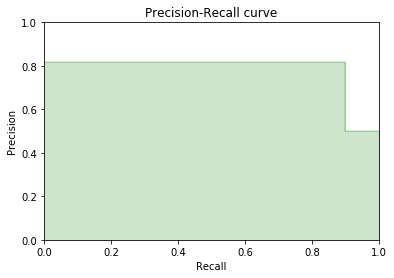

In [ ]:
#Precision-Recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(actual_a, predicted_a)
plt.step(recall, precision, color='g', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
# F1 Score
from sklearn.metrics import f1_score

# Harmonic mean of (a, b) is 2 * (a * b) / (a + b)
def my_f1_score(actual, predicted):
    return 2 * (my_precision_score(actual, predicted) * my_recall_score(actual, predicted)) / (my_precision_score(actual, predicted) + my_recall_score(actual, predicted))

print("my F1 Score A:", my_f1_score(actual_a, predicted_a))
print("sklearn F1 Score A:", f1_score(actual_a, predicted_a))

my F1 Score A: 0.8571428571428572
sklearn F1 Score A: 0.8571428571428572


sklearn ROC AUC Score A: 0.85


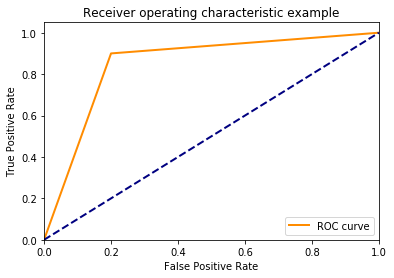

In [ ]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

print("sklearn ROC AUC Score A:", roc_auc_score(actual_a, predicted_a))
fpr, tpr, _ = roc_curve(actual_a, predicted_a)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #center line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()